In [33]:
import numpy as np
import pandas as pd

In [34]:
anime_titles = pd.read_csv('anime_cleaned.csv',usecols=[0,1])
df = pd.read_csv('animelists_cleaned.csv',usecols=[0,1,5],nrows=1000000)

In [35]:
anime_titles.head()

,anime_id,title
0,11013,Inu x Boku SS
1,2104,Seto no Hanayome
2,5262,Shugo Chara!! Doki
3,721,Princess Tutu
4,12365,Bakuman. 3rd Season


In [36]:
df.head()

,username,anime_id,my_score
0,karthiga,21,9
1,karthiga,59,7
2,karthiga,74,7
3,karthiga,120,7
4,karthiga,178,7


In [37]:
df = pd.merge(anime_titles,df,on='anime_id')
df['user_id'] = df.username.astype('category').cat.codes

In [38]:
df.head()

,anime_id,title,username,my_score,user_id
0,11013,Inu x Boku SS,karthiga,8,1767
1,11013,Inu x Boku SS,Slimak,0,1196
2,11013,Inu x Boku SS,MistButterfly,7,839
3,11013,Inu x Boku SS,Lithuelle,0,722
4,11013,Inu x Boku SS,magedgamed,7,1839


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [40]:
ratings = pd.DataFrame(df.groupby('title')['my_score'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['my_score'].count())
ratings.head()

,my_score,num of ratings
title,,
"""0""",2.545455,22
"""Aesop"" no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",3.000000,1
"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",4.591667,120
"""Bungaku Shoujo"" Memoire",4.016393,122
"""Bungaku Shoujo"" Movie",3.679325,237


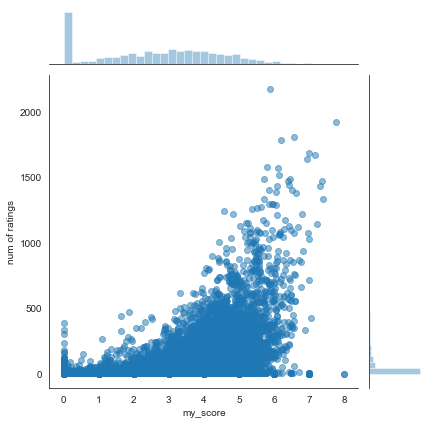

In [41]:
sns.jointplot(x='my_score',y='num of ratings',data=ratings,alpha=0.5)

In [42]:
animematrix = df.pivot_table(index='user_id',columns='title',values='my_score')
animematrix.head()

title,"""0""","""Aesop"" no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu","""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi","""Bungaku Shoujo"" Memoire","""Bungaku Shoujo"" Movie","""Eiji""","""Eikou Naki Tensai-tachi"" Kara no Monogatari","""Eiyuu"" Kaitai","""Kinako"" x Mameshiba Movie",.hack//G.U. Returner,...,the FLY BanD!,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,Üks Uks,ēlDLIVE,◯
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,8.0,8.0,8.0,8.0,8.0,NaN,6.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [43]:
jojo_user_ratings = animematrix['JoJo no Kimyou na Bouken: Stardust Crusaders 2nd Season']
similar_to_jojo = animematrix.corrwith(jojo_user_ratings)

D:\Programming_CRAP\NotAnaconda\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
D:\Programming_CRAP\NotAnaconda\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [44]:
corr_jojo = pd.DataFrame(similar_to_jojo,columns=['Correlation'])
corr_jojo.dropna(inplace=True)
corr_jojo = corr_jojo.join(ratings['num of ratings'])
corr_jojo[corr_jojo['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
JoJo no Kimyou na Bouken: Stardust Crusaders 2nd Season,1.000000,350
DearS: Kin no Tama desu no?,0.886636,128
Tenjou Tenge: The Past Chapter,0.824214,138
JoJo no Kimyou na Bouken: Stardust Crusaders,0.796686,430
Dog Days&#039;&#039;,0.786535,115
